In [1]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all
 
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

 
import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
 
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
 
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
# Set path nltk_data di dalam folder project
nltk_data_path = "C:/Users/Ahmad Musthofanur/Desktop/analisis-sentimen/nltk_data"
nltk.data.path.append(nltk_data_path)

# Download resource ke folder tersebut
nltk.download('punkt_tab', download_dir=nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)

[nltk_data] Downloading package punkt_tab to C:/Users/Ahmad
[nltk_data]     Musthofanur/Desktop/analisis-sentimen/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:/Users/Ahmad
[nltk_data]     Musthofanur/Desktop/analisis-sentimen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('ulasan_pubg.csv')
df.head()

reviewId       userName  \
0  99fb3b99-7abc-481d-af80-ed532b0bd911     Vince E. S   
1  b7f48138-da4d-4d03-9d3b-2edd04d1ecd4  Rufy Hermawan   
2  b29a7057-b121-4698-8606-e9da7b28f1d3   Anwar Sofyan   
3  b1cf49da-487d-4fa6-a3c3-c109eee9dae1  hanif diaerta   
4  0698bd84-3cae-470d-9703-86217024df7d     LuthXPubgm   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  Bintang 3 karena: 1. Performa; Untuk hp kelas ...      3             10   
1  Saya rasa PUBG dulu Lebih baik dari yang sekar...      5            591   
2  Ada beberapa yang perlu dikoreksi dari segi uk...      4             22   
3  masih terdapat banyak bug dalam ingame diantar...      1            403   
4  Game nya sudah bagus cuman tolong perbaiki mas...      5            155   

  reviewCreatedVersion                   at  \
0                3.7.0  2025-04-11 19:43:12   
1                3.7.0  2025-04-05 10:54:18   
2                3.7.0  2025-04-05 17:46:21   
3                3.7.0  2025-04-05 18:53:28   
4                3.7.0  2025-04-09 08:06:53   

                                        replyContent            repliedAt  \
0  Halo pemain,\nKami memahami perasaan Anda. Jik...  2025-04-11 21:13:34   
1  Hi pemain! Kami sepenuhnya memahami perasaan A...  2025-04-05 09:57:00   
2                                                NaN                  NaN   
3  Hai pemain! Kami telah memahami masalah yang A...  2025-04-07 14:44:13   
4                                                NaN                  NaN   

  appVersion  
0      3.7.0  
1      3.7.0  
2      3.7.0  
3      3.7.0  
4      3.7.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              40000 non-null  object
 1   userName              40000 non-null  object
 2   userImage             40000 non-null  object
 3   content               40000 non-null  object
 4   score                 40000 non-null  int64 
 5   thumbsUpCount         40000 non-null  int64 
 6   reviewCreatedVersion  28959 non-null  object
 7   at                    40000 non-null  object
 8   replyContent          15013 non-null  object
 9   repliedAt             15013 non-null  object
 10  appVersion            28959 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.4+ MB


In [4]:
clean_df = df.dropna()

In [5]:
print(f'Jumlah duplikasi data: {clean_df.duplicated().sum()}')

Jumlah duplikasi data: 0


In [6]:
print(f'Jumlah baris dan kolom: {clean_df.shape}')

Jumlah baris dan kolom: (10860, 11)


In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10860 entries, 0 to 39985
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10860 non-null  object
 1   userName              10860 non-null  object
 2   userImage             10860 non-null  object
 3   content               10860 non-null  object
 4   score                 10860 non-null  int64 
 5   thumbsUpCount         10860 non-null  int64 
 6   reviewCreatedVersion  10860 non-null  object
 7   at                    10860 non-null  object
 8   replyContent          10860 non-null  object
 9   repliedAt             10860 non-null  object
 10  appVersion            10860 non-null  object
dtypes: int64(2), object(9)
memory usage: 1018.1+ KB


In [8]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
 
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text
 
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    # Memecah teks menjadi daftar kata
    words = text.split()
 
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
 
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [9]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", 'hp': 'handphone', 'makasih': 'terima kasih', 'terimakasih': 'terima kasih', 'gw': 'saya', 'gk': 'tidak', 'knp': 'kenapa', 'sya': 'saya', 'ilang':'hilang', 'yg':'yang', 'udh':'sudah', 'aja':'saja', 'trus': 'terus', 'klo': 'kalau' }
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [10]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
 
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
 
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
 
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [11]:
clean_df.head()

reviewId         userName  \
0  99fb3b99-7abc-481d-af80-ed532b0bd911       Vince E. S   
1  b7f48138-da4d-4d03-9d3b-2edd04d1ecd4    Rufy Hermawan   
3  b1cf49da-487d-4fa6-a3c3-c109eee9dae1    hanif diaerta   
5  83af1722-1b4a-41c2-a88e-e85c381bcdc4  Berliana Rahmah   
6  a8c91174-4e8f-43fc-ac71-fc81448ea75c        Mhx_zn210   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
5  https://play-lh.googleusercontent.com/a-/ALV-U...   
6  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  Bintang 3 karena: 1. Performa; Untuk hp kelas ...      3             10   
1  Saya rasa PUBG dulu Lebih baik dari yang sekar...      5            591   
3  masih terdapat banyak bug dalam ingame diantar...      1            403   
5  Main dari season 3 awal awal masih oke. sinyal...      1             25   
6  Kenapa pas main di cheer park semua mobil/kend...      4           2923   

  reviewCreatedVersion                   at  \
0                3.7.0  2025-04-11 19:43:12   
1                3.7.0  2025-04-05 10:54:18   
3                3.7.0  2025-04-05 18:53:28   
5                3.7.0  2025-04-07 01:02:09   
6                3.7.0  2025-03-22 20:07:38   

                                        replyContent            repliedAt  \
0  Halo pemain,\nKami memahami perasaan Anda. Jik...  2025-04-11 21:13:34   
1  Hi pemain! Kami sepenuhnya memahami perasaan A...  2025-04-05 09:57:00   
3  Hai pemain! Kami telah memahami masalah yang A...  2025-04-07 14:44:13   
5  Halo pemain! Terima kasih atas perhatian dan d...  2025-04-07 15:12:18   
6  Yang terhormat pemain,\nKami menghargai masuka...  2025-01-12 15:46:35   

  appVersion                                         text_clean  \
0      3.7.0  Bintang  karena  Performa Untuk hp kelas Entry...   
1      3.7.0  Saya rasa PUBG dulu Lebih baik dari yang sekar...   
3      3.7.0  masih terdapat banyak bug dalam ingame diantar...   
5      3.7.0  Main dari season  awal awal masih oke sinyal a...   
6      3.7.0  Kenapa pas main di cheer park semua mobilkenda...   

                                text_casefoldingText  \
0  bintang  karena  performa untuk hp kelas entry...   
1  saya rasa pubg dulu lebih baik dari yang sekar...   
3  masih terdapat banyak bug dalam ingame diantar...   
5  main dari season  awal awal masih oke sinyal a...   
6  kenapa pas main di cheer park semua mobilkenda...   

                                     text_slangwords  \
0  bintang karena performa untuk handphone kelas ...   
1  saya rasa pubg dulu lebih baik dari yang sekar...   
3  masih terdapat banyak bug dalam ingame diantar...   
5  main dari season awal awal masih oke sinyal am...   
6  kenapa pas main di cheer park semua mobilkenda...   

                                 text_tokenizingText  \
0  [bintang, karena, performa, untuk, handphone, ...   
1  [saya, rasa, pubg, dulu, lebih, baik, dari, ya...   
3  [masih, terdapat, banyak, bug, dalam, ingame, ...   
5  [main, dari, season, awal, awal, masih, oke, s...   
6  [kenapa, pas, main, di, cheer, park, semua, mo...   

                                       text_stopword  \
0  [bintang, performa, handphone, kelas, entry, l...   
1  [pubg, berharap, developer, game, lebay, mengu...   
3  [bug, ingame, sinyal, ping, stabil, terkadang,...   
5  [main, season, oke, sinyal, aman, memory, aman...   
6  [pas, main, cheer, park, mobilkendaraan, ditem...   

                                          text_akhir  
0  bintang performa handphone kelas entry level b...  
1  pubg berharap developer game lebay mengupdate ...  
3  bug ingame sinyal ping stabil terkadang mengak...  
5  main season oke sinyal aman memory aman bug ke...  
6  pas main cheer park mobilkendaraan ditempat pa...

# Pelabelan

In [12]:
import csv
import requests
from io import StringIO
 
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")
 
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [13]:
# Fungsi untuk menentukan polaritas sentimen dari tweet
 
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
 
    score = 0
    # Inisialisasi skor sentimen ke 0
 
    for word in text:
        # Mengulangi setiap kata dalam teks
 
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
 
    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)
 
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen
 
    polarity=''
    # Inisialisasi variabel polaritas
 
    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
 
    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan
 
    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [14]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    6234
positive    4626
Name: count, dtype: int64


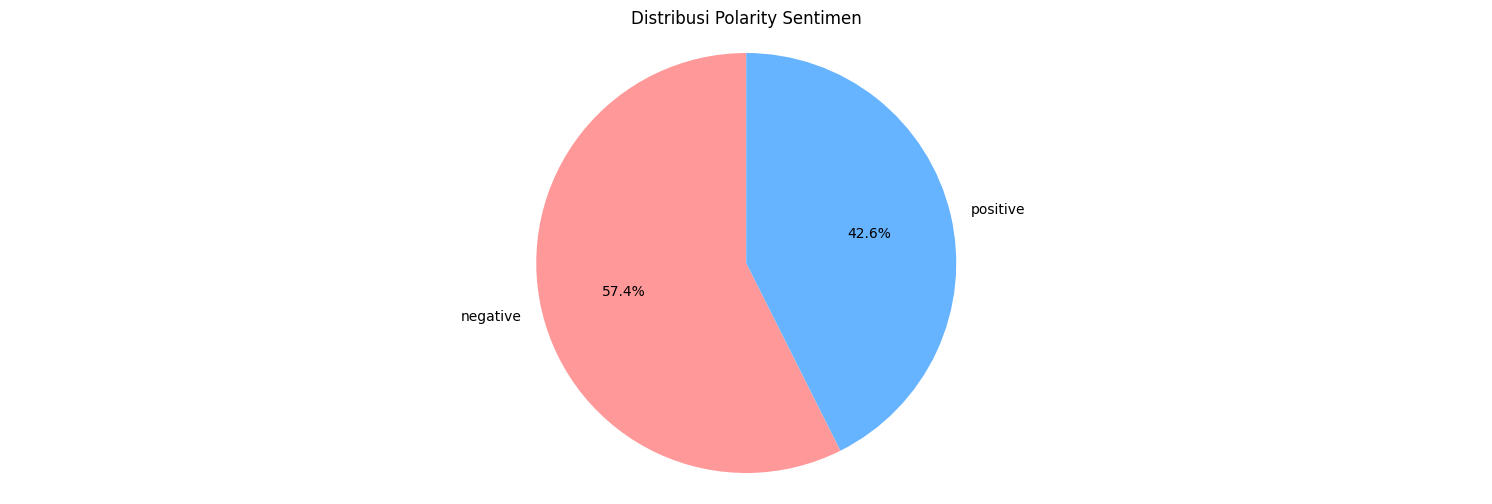

In [15]:
# Menghitung nilai distribusi dari 'polarity'
polarity_counts = clean_df['polarity'].value_counts()

# Membuat pie chart
plt.figure(figsize=(19, 6))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribusi Polarity Sentimen')
plt.axis('equal') 
plt.show()

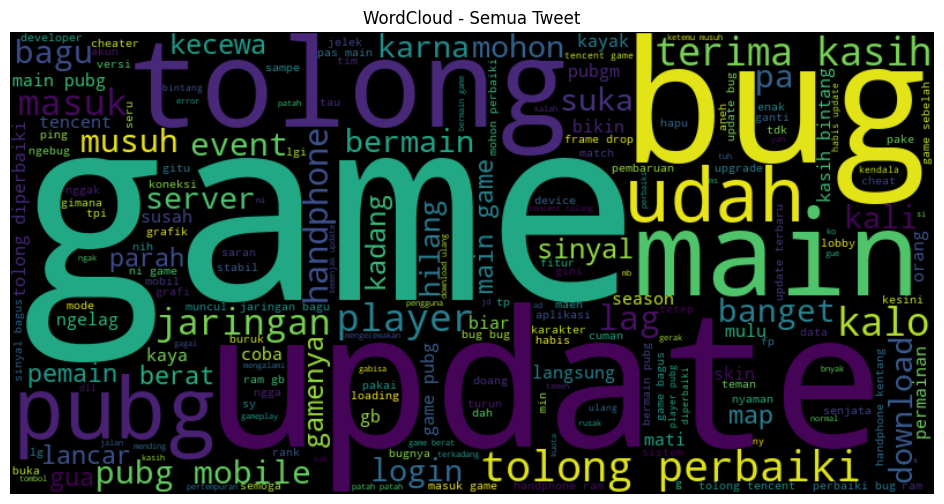

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks dari semua tweet
all_text = ' '.join(clean_df['text_akhir'].astype(str))

# Buat dan tampilkan WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Semua Tweet')
plt.show()


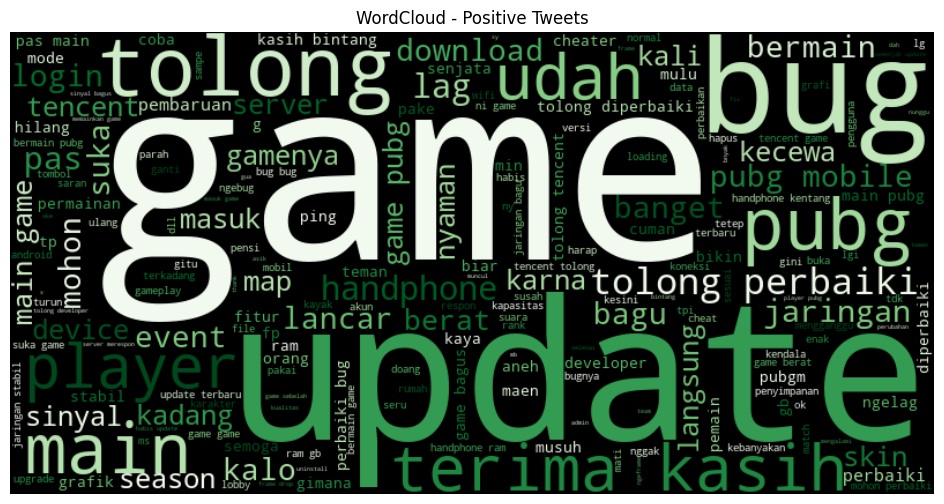

In [17]:
# Filter hanya tweet dengan polarity positif
positive_text = ' '.join(clean_df[clean_df['polarity'] == 'positive']['text_akhir'].astype(str))

# Buat dan tampilkan WordCloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='black', colormap='Greens').generate(positive_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Positive Tweets')
plt.show()


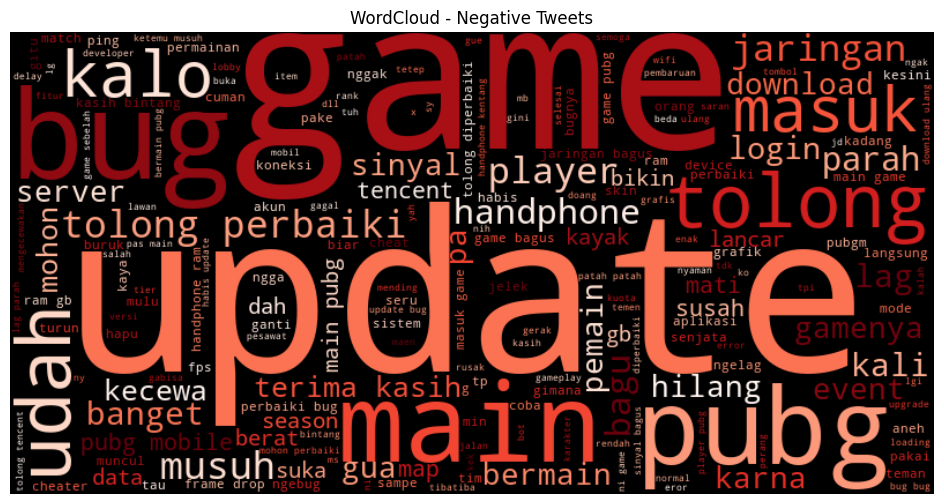

In [18]:
# Filter hanya tweet dengan polarity negatif
negative_text = ' '.join(clean_df[clean_df['polarity'] == 'negative']['text_akhir'].astype(str))

# Buat dan tampilkan WordCloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Negative Tweets')
plt.show()


In [19]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']
 
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1, 2), min_df=17, max_df=0.9)
X_tfidf = tfidf.fit_transform(X)
 
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
 
# Menampilkan hasil ekstraksi fitur
features_df
 
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.naive_bayes import BernoulliNB
 
# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
nb = BernoulliNB()
 
# Melatih model Naive Bayes pada data pelatihan
nb.fit(X_train.toarray(), y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = nb.predict(X_train.toarray())
y_pred_test_nb = nb.predict(X_test.toarray())
 
# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)
 
# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.8263121546961326
Naive Bayes - accuracy_test: 0.7840699815837937


In [21]:
from sklearn.linear_model import LogisticRegression
 
# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()
 
# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())
 
# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
 
# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)
 
# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9013581952117864
Logistic Regression - accuracy_test: 0.850828729281768


In [22]:
from sklearn.ensemble import RandomForestClassifier
 
# Membuat objek model Random Forest
rf = RandomForestClassifier()
 
# Melatih model Random Forest pada data pelatihan
rf.fit(X_train.toarray(), y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = rf.predict(X_train.toarray())
y_pred_test_rf = rf.predict(X_test.toarray())
 
# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)
 
# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 1.0
Random Forest - accuracy_test: 0.7822283609576427


In [23]:
from sklearn.tree import DecisionTreeClassifier
 
# Membuat objek model Decision Tree
dt = DecisionTreeClassifier()
 
# Melatih model Decision Tree pada data pelatihan
dt.fit(X_train.toarray(), y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = dt.predict(X_train.toarray())
y_pred_test_dt = dt.predict(X_test.toarray())
 
# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)
 
# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 1.0
Decision Tree - accuracy_test: 0.677255985267035


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro')
    }
    return results

In [25]:
# Mengevaluasi setiap model dan mengumpulkan hasilnya
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

results = {
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test),
    'Logistic Regression ': evaluate_model(logistic_regression, X_test, y_test),
    'Random Forest ': evaluate_model(rf, X_test, y_test),
    'Decision Tree ': evaluate_model(dt, X_test, y_test),

}

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)
# Tampilkan DataFrame
summary_df

Model  Accuracy  Precision    Recall  F1-Score
0      Naive Bayes (NB)  0.784070   0.779033  0.780719  0.779784
1  Logistic Regression   0.850829   0.850053  0.843290  0.846016
2        Random Forest   0.782228   0.779779  0.771059  0.774059
3        Decision Tree   0.677256   0.669509  0.668757  0.669100

# Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0]
}

# 2. Inisialisasi model
nb = BernoulliNB()

# 3. Inisialisasi dan fit GridSearchCV
grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid_nb, cv=3, n_jobs=-1, verbose=1)
grid_search_nb.fit(X_train.toarray(), y_train)

# 4. Simpan model terbaik
best_nb = grid_search_nb.best_estimator_

# 5. Prediksi dengan model terbaik
y_pred_nb = best_nb.predict(X_test.toarray())

# 6. Evaluasi hasil
print("‚úÖ Best Parameters (Naive Bayes):", grid_search_nb.best_params_)
print("üéØ Accuracy:", accuracy_score(y_test, y_pred_nb))
print("üìã Classification Report:\n", classification_report(y_test, y_pred_nb))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
‚úÖ Best Parameters (Naive Bayes): {'alpha': 1.0}
üéØ Accuracy: 0.7840699815837937
üìã Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.80      0.81      1249
    positive       0.74      0.76      0.75       923

    accuracy                           0.78      2172
   macro avg       0.78      0.78      0.78      2172
weighted avg       0.78      0.78      0.78      2172



In [27]:
# 1. Definisikan parameter grid untuk Logistic Regression
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

# 2. Inisialisasi model Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)

# 3. Inisialisasi dan fit GridSearchCV
grid_search_logreg = GridSearchCV(
    estimator=logistic_regression,
    param_grid=param_grid_logreg,
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_search_logreg.fit(X_train, y_train)

# 4. Simpan model terbaik
best_logreg = grid_search_logreg.best_estimator_

# 5. Prediksi dengan model terbaik
y_pred_logreg = best_logreg.predict(X_test)

# 6. Evaluasi hasil
print("‚úÖ Best Parameters (Logistic Regression):", grid_search_logreg.best_params_)
print("üéØ Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("üìã Classification Report:\n", classification_report(y_test, y_pred_logreg))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
‚úÖ Best Parameters (Logistic Regression): {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
üéØ Accuracy: 0.8632596685082873
üìã Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.89      0.88      1249
    positive       0.84      0.83      0.84       923

    accuracy                           0.86      2172
   macro avg       0.86      0.86      0.86      2172
weighted avg       0.86      0.86      0.86      2172



In [28]:
# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

#Parameter grid untuk tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV dengan data pelatihan
grid_search.fit(X_train, y_train)

# Ambil model terbaik setelah tuning
best_rf_grid = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_rf = best_rf_grid.predict(X_test)

# Evaluasi hasil
print("‚úÖ Random Forest - accuracy:", accuracy_score(y_test, y_pred_rf))
print("üéØ Best Parameters (Random Forest):", grid_search.best_params_)
print("üìã Classification Report:\n", classification_report(y_test, y_pred_rf))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
‚úÖ Random Forest - accuracy: 0.746316758747698
üéØ Best Parameters (Random Forest): {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
üìã Classification Report:
               precision    recall  f1-score   support

    negative       0.72      0.91      0.80      1249
    positive       0.81      0.53      0.64       923

    accuracy                           0.75      2172
   macro avg       0.76      0.72      0.72      2172
weighted avg       0.76      0.75      0.73      2172



In [29]:
# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Parameter grid untuk tuning
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Inisialisasi GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV dengan data pelatihan
grid_search_dt.fit(X_train, y_train)

# Ambil model terbaik setelah tuning
best_dt_grid = grid_search_dt.best_estimator_

# Prediksi dengan model terbaik
y_pred_dt = best_dt_grid.predict(X_test)

# Evaluasi hasil
print("‚úÖ Best Parameters (Decision Tree):", grid_search_dt.best_params_)
print("‚úÖ Accuracy:", accuracy_score(y_test, y_pred_dt))
print("üìã Classification Report:\n", classification_report(y_test, y_pred_dt))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
‚úÖ Best Parameters (Decision Tree): {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
‚úÖ Accuracy: 0.6933701657458563
üìã Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.74      0.74      1249
    positive       0.64      0.63      0.64       923

    accuracy                           0.69      2172
   macro avg       0.69      0.68      0.69      2172
weighted avg       0.69      0.69      0.69      2172



In [30]:
def evaluate_models(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro')
    }
    return results

In [31]:
results = {
    'Naive Bayes (NB) Hyperparameter Tuning': evaluate_models(grid_search_nb.best_estimator_, X_test, y_test),
    'Logistic Regression Hyperparameter Tuning': evaluate_models(grid_search_logreg.best_estimator_, X_test, y_test),
    'Random Forest Hyperparameter Tuning': evaluate_models(best_rf_grid, X_test, y_test),
    'Decision Tree Hyperparameter Tuning': evaluate_models(grid_search_dt.best_estimator_, X_test, y_test),

}

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Buat DataFrame untuk meringkas hasil
summary_tun_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Konversi daftar kamus ke DataFrame
summary_tun_df = pd.DataFrame(rows)
# Tampilkan DataFrame
summary_tun_df

Model  Accuracy  Precision    Recall  \
0     Naive Bayes (NB) Hyperparameter Tuning  0.784070   0.779033  0.780719   
1  Logistic Regression Hyperparameter Tuning  0.863260   0.860568  0.859189   
2        Random Forest Hyperparameter Tuning  0.746317   0.764896  0.718060   
3        Decision Tree Hyperparameter Tuning  0.693370   0.686006  0.684889   

   F1-Score  
0  0.779784  
1  0.859845  
2  0.721948  
3  0.685386

# Model Performance Metrics

## Table 1: Regular Model Performance

| **Model**               | **Accuracy** | **Precision** | **Recall** | **F1-Score** |
|-------------------------|--------------|---------------|------------|--------------|
| **Naive Bayes (NB)**    | 0.784070     | 0.779033      | 0.780719   | 0.779784     |
| **Logistic Regression** | 0.850829     | 0.850053      | 0.843290   | 0.846016     |
| **Random Forest**       | 0.782228     | 0.779779      | 0.771059   | 0.774059     |
| **Decision Tree**       | 0.677256     | 0.669509      | 0.668757   | 0.669100     |

## Table 2: Hyperparameter Tuned Model Performance

| **Model**                                   | **Accuracy** | **Precision** | **Recall** | **F1-Score** |
|---------------------------------------------|--------------|---------------|------------|--------------|
| **Naive Bayes (NB) Hyperparameter Tuning**  | 0.784070     | 0.779033      | 0.780719   | 0.779784     |
| **Logistic Regression Hyperparameter Tuning**| 0.863260     | 0.860568      | 0.859189   | 0.859845     |
| **Random Forest Hyperparameter Tuning**     | 0.746317     | 0.764896      | 0.718060   | 0.721948     |
| **Decision Tree Hyperparameter Tuning**     | 0.693370     | 0.686006      | 0.684889   | 0.685386     |


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Tokenisasi teks
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')  # OOV: Out Of Vocabulary
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Padding supaya panjangnya seragam
X_pad = pad_sequences(X_seq, maxlen=100)

# Encode label (positive/negative) ke angka
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

# Bangun model LSTM
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))  # Input dim = vocab size, output dim = embedding size
model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))  # LSTM layer dengan L2 regularization
model.add(Dropout(0.5))  # Dropout untuk regularisasi
model.add(BatchNormalization())  # Menambahkan Batch Normalization untuk stabilitas
model.add(LSTM(64, kernel_regularizer=l2(0.01)))  # LSTM layer kedua
model.add(Dropout(0.5))  # Dropout untuk regularisasi
model.add(Dense(1, activation='sigmoid'))  # Output layer dengan sigmoid activation untuk binary classification

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() 

# EarlyStopping Callback untuk menghentikan pelatihan lebih awal jika tidak ada peningkatan
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Latih model dengan callback EarlyStopping
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])



C:\Users\Ahmad Musthofanur\.virtualenvs\analisis-sentimen-_2Ngea8m\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)                ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm (LSTM)                          ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ ?                           ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization                  ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_1 (LSTM)                        ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)                  ‚îÇ ?                           ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
136/136 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26s 137ms/step - accuracy: 0.6215 - loss: 2.7146 - val_accuracy: 0.4254 - val_loss: 1.0823
Epoch 2/10
136/136 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 124ms/step - accuracy: 0.8397 - loss: 0.6406 - val_accuracy: 0.7270 - val_loss: 0.6417
Epoch 3/10
136/136 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 128ms/step - accuracy: 0.9211 - loss: 0.3363 - val_accuracy: 0.8200 - val_loss: 0.4688
Epoch 4/10
136/136 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 130ms/step - accuracy: 0.9497 - loss: 0.2280 - val_accuracy: 0.7403 - val_loss: 0.6037
Epoch 5/10
136/136 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 130ms/step - accuracy: 0.9639 - loss: 0.1647 - val_accuracy: 0.8421 - val_loss: 0.4638
Epoch 6/10
136/136 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 129ms/step - accuracy: 0.9760 - loss: 0.1200 - val_accuracy: 

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi pada data test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Ubah label 0/1 ke 'Negative'/'Positive'
y_pred_labels = ['Positive' if label else 'Negative' for label in y_pred]
y_test_labels = ['Positive' if label else 'Negative' for label in y_test]

# Menampilkan Classification Report
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))

# Menampilkan Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_labels))


68/68 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 30ms/step
Classification Report:
               precision    recall  f1-score   support

    Negative       0.93      0.79      0.85      1249
    Positive       0.76      0.91      0.83       923

    accuracy                           0.84      2172
   macro avg       0.84      0.85      0.84      2172
weighted avg       0.86      0.84      0.84      2172

Confusion Matrix:
 [[985 264]
 [ 79 844]]


In [34]:
# Prediksi pada data test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Mengubah probabilitas menjadi label biner (0 atau 1)

# Menampilkan Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Menampilkan Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

68/68 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 27ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85      1249
           1       0.76      0.91      0.83       923

    accuracy                           0.84      2172
   macro avg       0.84      0.85      0.84      2172
weighted avg       0.86      0.84      0.84      2172

Confusion Matrix:
 [[985 264]
 [ 79 844]]


In [35]:
model.evaluate(X_test, y_test, batch_size=64)

34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 44ms/step - accuracy: 0.8385 - loss: 0.4613


[0.4638381004333496, 0.8420810103416443]